<a href="https://colab.research.google.com/github/canoztas/CMP684-Neural-Networks-FinalProject/blob/main/nn_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neat-python

In [ ]:
import pandas as pd
from sklearn import preprocessing

In [ ]:
house = pd.read_csv("/content/sample_data/california_housing_train.csv")
house2 = pd.read_csv("/content/sample_data/california_housing_test.csv")
house = house.append(house2)

<ipython-input-2-09cf42d3d369>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  house = house.append(house2)


In [ ]:
x = house.iloc[:,:-1].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [ ]:
l = []

In [ ]:
for h in house.iloc[:,8].values.astype(tuple):
  l.append(h)

In [ ]:
import neat

inputs = [tuple(x) for x in df.values]
outputs = l

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(inputs, outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo) ** 2


# Load configuration.
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     '/content/config-feedforward.txt')

# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(False))

# Run until a solution is found.
winner = p.run(eval_genomes)

# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))

# Show output of the most fit genome against training data.
print('\nOutput:')
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
for xi, xo in zip(xor_inputs, xor_outputs):
    output = winner_net.activate(xi)
    print("  input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split( [tuple(x) for x in df.values], l)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(8,)),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mean_absolute_percentage_error'])


In [ ]:
epochs = [10,20,50,100,250,500,1000]
results = []

In [ ]:
for e in epochs:
  history = model.fit(X_train, y_train, epochs=e, validation_data=(X_valid, y_valid))
  mse_test = model.evaluate(X_test, y_test)
  results.append(mse_test)

Epoch 1/10
352/352 [==============================] - 1s 2ms/step - loss: 62880284672.0000 - root_mean_squared_error: 250759.4219 - mean_absolute_percentage_error: 68.3462 - val_loss: 13941985280.0000 - val_root_mean_squared_error: 118076.1875 - val_mean_absolute_percentage_error: 61.9214
Epoch 2/10
352/352 [==============================] - 1s 1ms/step - loss: 13001038848.0000 - root_mean_squared_error: 114022.1016 - mean_absolute_percentage_error: 61.1050 - val_loss: 13927762944.0000 - val_root_mean_squared_error: 118015.9453 - val_mean_absolute_percentage_error: 62.6196
Epoch 3/10
352/352 [==============================] - 1s 1ms/step - loss: 13001454592.0000 - root_mean_squared_error: 114023.9219 - mean_absolute_percentage_error: 61.2727 - val_loss: 13935916032.0000 - val_root_mean_squared_error: 118050.4844 - val_mean_absolute_percentage_error: 62.1812
Epoch 4/10
352/352 [==============================] - 1s 2ms/step - loss: 13002679296.0000 - root_mean_squared_error: 114029.2891 

In [ ]:
last = []

In [ ]:
for r in results:
  last.append(r[2])

In [ ]:
last

[63.144161224365234,
 61.79692459106445,
 61.339744567871094,
 60.65351104736328,
 61.21049499511719,
 62.08242416381836,
 62.442413330078125]

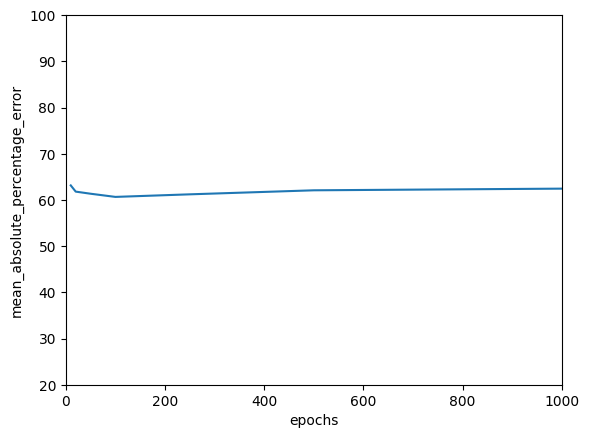

In [ ]:
plt.plot(epochs,last)
plt.ylabel('mean_absolute_percentage_error')
plt.xlim(0,1000)
plt.ylim(20,100)
plt.xlabel('epochs')
plt.show()